In [ ]:
import biosignalsnotebooks as bsnb
from numpy import arange, sin, pi
from numpy.random import randn
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
from IPython.display import display
import sympy

# Lectura de la data

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("Basal_ECG.txt", delimiter="\t")
array2 = np.genfromtxt("Aguantando_respiracion_ECG.txt", delimiter="\t")
array3 = np.genfromtxt("Post_ejercicio_ECG.txt", delimiter="\t")

Cortamos las señales y nos quedamos con la parte que no presenta errores en medición.


In [ ]:
#Nos quedamos con el dato del sensor
#Estado basal
basal = array1[:,-2]
basal = basal[1000:31000]
#Aguantando la respiración
respiracion = array2[:,-2]
respiracion =respiracion[1000:31000]
#Post-ejercicio
ejercicio = array3[:,-2]
ejercicio = ejercicio[1000:31000]

Definimos la frecuencia de muestreo

In [ ]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición


# Realizamos los espectros de frecuencias de las señales

(0.0, 10000.0)

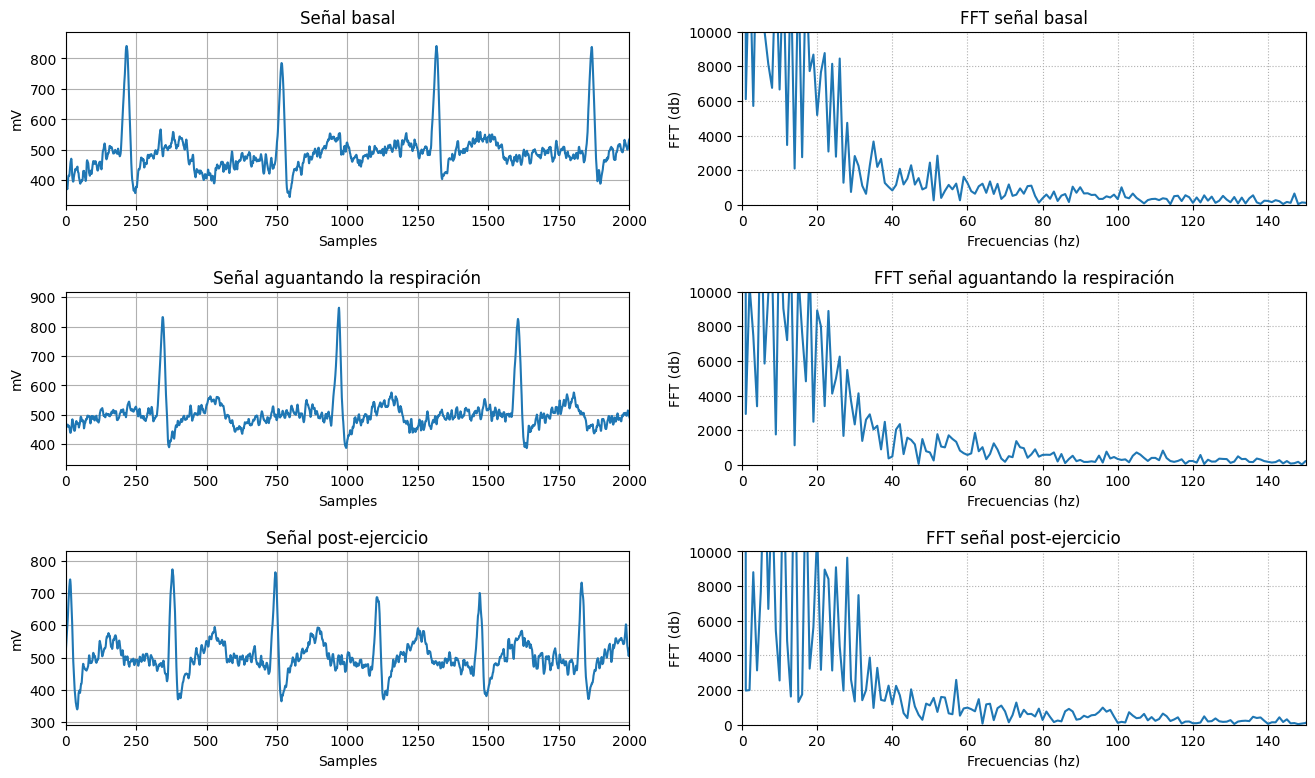

In [ ]:
N=2**10 # 10 bits
#FFT de señal basal
Basal = np.fft.fft(basal,N)
Basal = Basal[0:N//2]
Basalm = np.abs(Basal)
F = np.linspace(0,Fs/2,N//2)
#FFT de señal aguantando respiración
Respiracion = np.fft.fft(respiracion,N)
Respiracion = Respiracion[0:N//2]
Respiracionm = np.abs(Respiracion)
F = np.linspace(0,Fs/2,N//2)
#FFT de señal post-ejercicio
Ejercicio = np.fft.fft(ejercicio,N)
Ejercicio = Ejercicio[0:N//2]
Ejerciciom = np.abs(Ejercicio)
F = np.linspace(0,Fs/2,N//2)

#Graficamos las señales y sus FFT
fig, axs = plt.subplots(3, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(basal)
axs[0, 0].set_title('Señal basal')
axs[0, 0].set_xlabel('Samples')
axs[0, 0].set_ylabel('mV')
axs[0, 0].grid(True)
axs[0, 0].set_xlim(0,2000)

axs[0, 1].plot(Basalm)
axs[0, 1].set_title('FFT señal basal')
axs[0, 1].set_xlabel('Frecuencias (hz)')
axs[0, 1].set_ylabel("FFT (db)")
axs[0, 1].grid(linestyle=":")
axs[0, 1].set_xlim(0,150)
axs[0, 1].set_ylim(0,10000)

axs[1, 0].plot(respiracion)
axs[1, 0].set_title('Señal aguantando la respiración')
axs[1, 0].set_xlabel('Samples')
axs[1, 0].set_ylabel('mV')
axs[1, 0].grid(True)
axs[1, 0].set_xlim(0,2000)

axs[1, 1].plot(Respiracionm)
axs[1, 1].set_title('FFT señal aguantando la respiración')
axs[1, 1].set_xlabel('Frecuencias (hz)')
axs[1, 1].set_ylabel("FFT (db)")
axs[1, 1].grid(linestyle=":")
axs[1, 1].set_xlim(0,150)
axs[1, 1].set_ylim(0,10000)

axs[2, 0].plot(ejercicio)
axs[2, 0].set_title('Señal post-ejercicio')
axs[2, 0].set_xlabel('Samples')
axs[2, 0].set_ylabel('mV')
axs[2, 0].grid(True)
axs[2, 0].set_xlim(0,2000)

axs[2, 1].plot(Ejerciciom)
axs[2, 1].set_title('FFT señal post-ejercicio')
axs[2, 1].set_xlabel('Frecuencias (hz)')
axs[2, 1].set_ylabel("FFT (db)")
axs[2, 1].grid(linestyle=":")
axs[2, 1].set_xlim(0,150)
axs[2, 1].set_ylim(0,10000)

#plt.plot(F, Ejerciciom)
#plt.grid(linestyle=":")
#plt.title("Analisis espectral de las señal post_ejercicio")
#plt.xlabel("Frecuencias (hz)")
#plt.ylabel("FFT (db)")
#plt.xlim(0,150)
#plt.ylim(0,10000)
#plt.show()

# Filtramos las señales 


In [ ]:
# Creamos un filtro Butterworth de tercer orden y con una frecuencia de 30 Hz para la señal basal
basal_filter = bsnb.lowpass(basal, 30, order=3)
filtfilt_basal = bsnb.lowpass(basal, 30, order=3, use_filtfilt=True)

# Creamos un filtro Butterworth de tercer orden y con una frecuencia de 40 Hz para la señal aguantando la respiración
respiracion_filter = bsnb.lowpass(respiracion, 40, order=3)
filtfilt_respiracion = bsnb.lowpass(respiracion, 40, order=3, use_filtfilt=True)

# Creamos un filtro Butterworth de tercer orden y con una frecuencia de 50 Hz para la señal post ejercicio
ejercicio_filter = bsnb.lowpass(ejercicio, 50, order=3)
filtfilt_ejercicio = bsnb.lowpass(ejercicio, 100, order=3, use_filtfilt=True)

Ploteamos las señales

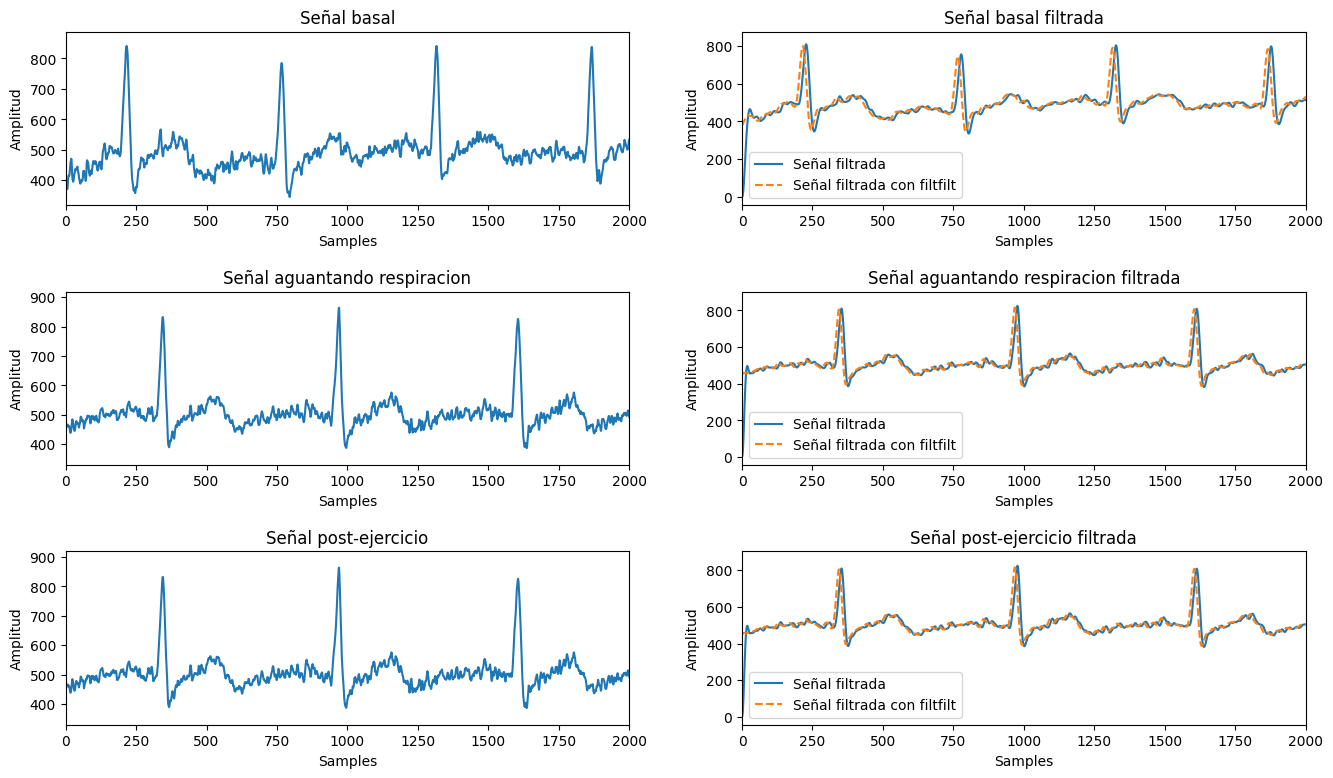

In [ ]:
#Ploteamos la señal original,señal filtrada y señal filtrada con filtfilt para los 3 casos

# Crear una figura y tres subgráficas
fig, axs = plt.subplots(3, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)
# Graficar la primera subgráfica con dos señales
axs[0,0].plot(basal,label='Señal original')
axs[0,0].set_title('Señal basal')
axs[0,0].set_xlabel('Samples')
axs[0,0].set_ylabel('Amplitud')
axs[0,0].set_xlim(0,2000)

axs[0,1].plot(basal_filter,label='Señal filtrada')
axs[0,1].plot(filtfilt_basal,label='Señal filtrada con filtfilt',linestyle="--")
axs[0,1].set_title('Señal basal filtrada')
axs[0,1].set_xlabel('Samples')
axs[0,1].set_ylabel('Amplitud')
axs[0,1].set_xlim(0,2000)
axs[0,1].legend()

# Graficar la segunda subgráfica con dos señales
axs[1,0].plot(respiracion,label='Señal original')
axs[1,0].set_title('Señal aguantando respiracion')
axs[1,0].set_xlabel('Samples')
axs[1,0].set_ylabel('Amplitud')
axs[1,0].set_xlim(0,2000)

axs[1,1].plot(respiracion_filter,label='Señal filtrada')
axs[1,1].plot(filtfilt_respiracion,label='Señal filtrada con filtfilt',linestyle="--")
axs[1,1].set_title('Señal aguantando respiracion filtrada')
axs[1,1].set_xlabel('Samples')
axs[1,1].set_ylabel('Amplitud')
axs[1,1].set_xlim(0,2000)
axs[1,1].legend()

# Graficar la tercera subgráfica con dos señales
axs[2,0].plot(respiracion,label='Señal original')
axs[2,0].set_title('Señal post-ejercicio')
axs[2,0].set_xlabel('Samples')
axs[2,0].set_ylabel('Amplitud')
axs[2,0].set_xlim(0,2000)

axs[2,1].plot(respiracion_filter,label='Señal filtrada')
axs[2,1].plot(filtfilt_respiracion,label='Señal filtrada con filtfilt',linestyle="--")
axs[2,1].set_title('Señal post-ejercicio filtrada')
axs[2,1].set_xlabel('Samples')
axs[2,1].set_ylabel('Amplitud')
axs[2,1].set_xlim(0,2000)
axs[2,1].legend()

#plt.plot(ejercicio)
#plt.plot(ejercicio_filter)
#plt.plot(filtfilt_ejercicio)
#plt.xlim(700,3000)
#plt.ylim(0,10000)
#plt.plot(filtfilt_signal)